In [1]:
!pip install meteostat scikit-learn pandas

In [2]:
#Importamos librerías necesarias:
from datetime import datetime
from meteostat import Point
from meteostat import Hourly
from meteostat import Daily
from meteostat import Monthly

import numpy as np
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot 

from sklearn.linear_model import LinearRegression

In [3]:
# Se obtienen todos los datos de varios puntos: Cataluña, Andalucía, Valencia, Canarias y Baleares 
    #y se almacenan en dataset por year 
#Andalucía: Málaga
#Cataluña: Girona
#Comunidad Valenciana: Alicante
#Canarias: Las Palmas de Gran Canarias
#Baleares: Palma
point_malaga = Point(36.72016, -4.42034)
point_girona = Point(41.98311, 2.82493)
point_alicante = Point(38.34517, -0.48149)
point_canarias = Point(28.09973, -15.41343)
point_palma = Point(39.56939, 2.65024)

In [4]:
#Datos de Málaga
data_tot_malaga = Daily(point_malaga, datetime(2010, 1, 1), datetime(2023, 12, 31))
data2023_malaga = Daily(point_malaga, datetime(2023, 1, 1), datetime(2023, 12, 31))
data2022_malaga = Daily(point_malaga, datetime(2022, 1, 1), datetime(2022, 12, 31))
data2021_malaga = Daily(point_malaga, datetime(2021, 1, 1), datetime(2021, 12, 31))
data2020_malaga = Daily(point_malaga, datetime(2020, 1, 1), datetime(2020, 12, 31))
data2019_malaga = Daily(point_malaga, datetime(2019, 1, 1), datetime(2019, 12, 31))
data2018_malaga = Daily(point_malaga, datetime(2018, 1, 1), datetime(2018, 12, 31))
data2017_malaga = Daily(point_malaga, datetime(2017, 1, 1), datetime(2017, 12, 31))
data2016_malaga = Daily(point_malaga, datetime(2016, 1, 1), datetime(2016, 12, 31))
data2015_malaga = Daily(point_malaga, datetime(2015, 1, 1), datetime(2015, 12, 31))
data2014_malaga = Daily(point_malaga, datetime(2014, 1, 1), datetime(2014, 12, 31))
data2013_malaga = Daily(point_malaga, datetime(2013, 1, 1), datetime(2013, 12, 31))
data2012_malaga = Daily(point_malaga, datetime(2012, 1, 1), datetime(2012, 12, 31))
data2011_malaga = Daily(point_malaga, datetime(2011, 1, 1), datetime(2011, 12, 31))
data2010_malaga = Daily(point_malaga, datetime(2010, 1, 1), datetime(2010, 12, 31))

data_tot_malaga = data_tot_malaga.fetch()
data2023_malaga = data2023_malaga.fetch()
data2022_malaga = data2022_malaga.fetch()
data2021_malaga = data2021_malaga.fetch()
data2020_malaga = data2020_malaga.fetch()
data2019_malaga = data2019_malaga.fetch()
data2018_malaga = data2018_malaga.fetch()
data2017_malaga = data2017_malaga.fetch()
data2016_malaga = data2016_malaga.fetch()
data2015_malaga = data2015_malaga.fetch()
data2014_malaga = data2014_malaga.fetch()
data2013_malaga = data2013_malaga.fetch()
data2012_malaga = data2012_malaga.fetch()
data2011_malaga = data2011_malaga.fetch()
data2010_malaga = data2010_malaga.fetch()

data_tot_malaga = data_tot_malaga.fillna(0)
data2023_malaga = data2023_malaga.fillna(0)
data2022_malaga = data2022_malaga.fillna(0)
data2021_malaga = data2021_malaga.fillna(0)
data2020_malaga = data2020_malaga.fillna(0)
data2019_malaga = data2019_malaga.fillna(0)
data2018_malaga = data2018_malaga.fillna(0)
data2017_malaga = data2017_malaga.fillna(0)
data2016_malaga = data2016_malaga.fillna(0)
data2015_malaga = data2015_malaga.fillna(0)
data2014_malaga = data2014_malaga.fillna(0)
data2013_malaga = data2013_malaga.fillna(0)
data2012_malaga = data2012_malaga.fillna(0)
data2011_malaga = data2011_malaga.fillna(0)
data2010_malaga = data2010_malaga.fillna(0)

In [5]:
# Añadimos varias columnas: latitud, altitud y literal de la ciudad
new_columns = {
    'latitud': 36.72016,
    'altitud': -4.42034,
    'ciudad': 'Málaga'
}

for col, value in new_columns.items():
    data_tot_malaga[col] = value
    data2023_malaga[col] = value
    data2022_malaga[col] = value
    data2021_malaga[col] = value
    data2020_malaga[col] = value
    data2019_malaga[col] = value
    data2018_malaga[col] = value
    data2017_malaga[col] = value
    data2016_malaga[col] = value
    data2015_malaga[col] = value
    data2014_malaga[col] = value
    data2013_malaga[col] = value
    data2012_malaga[col] = value
    data2011_malaga[col] = value
    data2010_malaga[col] = value    

In [6]:
print(data_tot_malaga.head())

            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt  pres  tsun  \
time                                                                      
2010-01-01  13.4  10.2  17.6   0.0   0.0  298.0  14.0   0.0   0.0   0.0   
2010-01-02  12.3   8.0  20.7   0.0   0.0    0.0   9.4   0.0   0.0   0.0   
2010-01-03  11.9   6.5  18.0   0.0   0.0    0.0   9.7   0.0   0.0   0.0   
2010-01-04  14.7  12.0  18.8  39.4   0.0    0.0   7.2   0.0   0.0   0.0   
2010-01-05  14.3  12.0  18.8   0.0   0.0    0.0  10.4   0.0   0.0   0.0   

             latitud  altitud  ciudad  
time                                   
2010-01-01  36.72016 -4.42034  Málaga  
2010-01-02  36.72016 -4.42034  Málaga  
2010-01-03  36.72016 -4.42034  Málaga  
2010-01-04  36.72016 -4.42034  Málaga  
2010-01-05  36.72016 -4.42034  Málaga  


In [7]:
#Datos de Girona
data_tot_girona = Daily(point_girona, datetime(2010, 1, 1), datetime(2023, 12, 31))
data2023_girona = Daily(point_girona, datetime(2023, 1, 1), datetime(2023, 12, 31))
data2022_girona = Daily(point_girona, datetime(2022, 1, 1), datetime(2022, 12, 31))
data2021_girona = Daily(point_girona, datetime(2021, 1, 1), datetime(2021, 12, 31))
data2020_girona = Daily(point_girona, datetime(2020, 1, 1), datetime(2020, 12, 31))
data2019_girona = Daily(point_girona, datetime(2019, 1, 1), datetime(2019, 12, 31))
data2018_girona = Daily(point_girona, datetime(2018, 1, 1), datetime(2018, 12, 31))
data2017_girona = Daily(point_girona, datetime(2017, 1, 1), datetime(2017, 12, 31))
data2016_girona = Daily(point_girona, datetime(2016, 1, 1), datetime(2016, 12, 31))
data2015_girona = Daily(point_girona, datetime(2015, 1, 1), datetime(2015, 12, 31))
data2014_girona = Daily(point_girona, datetime(2014, 1, 1), datetime(2014, 12, 31))
data2013_girona = Daily(point_girona, datetime(2013, 1, 1), datetime(2013, 12, 31))
data2012_girona = Daily(point_girona, datetime(2012, 1, 1), datetime(2012, 12, 31))
data2011_girona = Daily(point_girona, datetime(2011, 1, 1), datetime(2011, 12, 31))
data2010_girona = Daily(point_girona, datetime(2010, 1, 1), datetime(2010, 12, 31))

data_tot_girona = data_tot_girona.fetch()
data2023_girona = data2023_girona.fetch()
data2022_girona = data2022_girona.fetch()
data2021_girona = data2021_girona.fetch()
data2020_girona = data2020_girona.fetch()
data2019_girona = data2019_girona.fetch()
data2018_girona = data2018_girona.fetch()
data2017_girona = data2017_girona.fetch()
data2016_girona = data2016_girona.fetch()
data2015_girona = data2015_girona.fetch()
data2014_girona = data2014_girona.fetch()
data2013_girona = data2013_girona.fetch()
data2012_girona = data2012_girona.fetch()
data2011_girona = data2011_girona.fetch()
data2010_girona = data2010_girona.fetch()

data2023_girona = data2023_girona.fillna(0)
data2022_girona = data2022_girona.fillna(0)
data2021_girona = data2021_girona.fillna(0)
data2020_girona = data2020_girona.fillna(0)
data2019_girona = data2019_girona.fillna(0)
data2018_girona = data2018_girona.fillna(0)
data2017_girona = data2017_girona.fillna(0)
data2016_girona = data2016_girona.fillna(0)
data2015_girona = data2015_girona.fillna(0)
data2014_girona = data2014_girona.fillna(0)
data2013_girona = data2013_girona.fillna(0)
data2012_girona = data2012_girona.fillna(0)
data2011_girona = data2011_girona.fillna(0)
data2010_girona = data2010_girona.fillna(0)

In [8]:
# Añadimos varias columnas: latitud, altitud y literal de la ciudad
new_columns = {
    'latitud': 41.98311,
    'altitud': 2.82493,
    'ciudad': 'Girona'
}

for col, value in new_columns.items():
    data_tot_girona[col] = value
    data2023_girona[col] = value
    data2022_girona[col] = value
    data2021_girona[col] = value
    data2020_girona[col] = value
    data2019_girona[col] = value
    data2018_girona[col] = value
    data2017_girona[col] = value
    data2016_girona[col] = value
    data2015_girona[col] = value
    data2014_girona[col] = value
    data2013_girona[col] = value
    data2012_girona[col] = value
    data2011_girona[col] = value
    data2010_girona[col] = value    

In [9]:
print(data_tot_girona.head())

            tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun  \
time                                                                       
2010-01-01   9.6   2.8  14.3   0.0   NaN   NaN   7.0   NaN   998.8   NaN   
2010-01-02   5.8   1.5  12.5   0.0   NaN   NaN   2.6   NaN  1016.6   NaN   
2010-01-03   7.2   5.1  11.0   0.0   NaN   NaN   5.4   NaN  1017.9   NaN   
2010-01-04   7.1   4.4  10.8   9.0   NaN   NaN   4.1   NaN  1010.9   NaN   
2010-01-05   8.0   7.4   9.5   0.8   NaN  10.0   9.4   NaN  1001.3   NaN   

             latitud  altitud  ciudad  
time                                   
2010-01-01  41.98311  2.82493  Girona  
2010-01-02  41.98311  2.82493  Girona  
2010-01-03  41.98311  2.82493  Girona  
2010-01-04  41.98311  2.82493  Girona  
2010-01-05  41.98311  2.82493  Girona  


In [10]:
#Datos de Alicante
data_tot_alicante = Daily(point_alicante, datetime(2010, 1, 1), datetime(2023, 12, 31))
data2023_alicante = Daily(point_alicante, datetime(2023, 1, 1), datetime(2023, 12, 31))
data2022_alicante = Daily(point_alicante, datetime(2022, 1, 1), datetime(2022, 12, 31))
data2021_alicante = Daily(point_alicante, datetime(2021, 1, 1), datetime(2021, 12, 31))
data2020_alicante = Daily(point_alicante, datetime(2020, 1, 1), datetime(2020, 12, 31))
data2019_alicante = Daily(point_alicante, datetime(2019, 1, 1), datetime(2019, 12, 31))
data2018_alicante = Daily(point_alicante, datetime(2018, 1, 1), datetime(2018, 12, 31))
data2017_alicante = Daily(point_alicante, datetime(2017, 1, 1), datetime(2017, 12, 31))
data2016_alicante = Daily(point_alicante, datetime(2016, 1, 1), datetime(2016, 12, 31))
data2015_alicante = Daily(point_alicante, datetime(2015, 1, 1), datetime(2015, 12, 31))
data2014_alicante = Daily(point_alicante, datetime(2014, 1, 1), datetime(2014, 12, 31))
data2013_alicante = Daily(point_alicante, datetime(2013, 1, 1), datetime(2013, 12, 31))
data2012_alicante = Daily(point_alicante, datetime(2012, 1, 1), datetime(2012, 12, 31))
data2011_alicante = Daily(point_alicante, datetime(2011, 1, 1), datetime(2011, 12, 31))
data2010_alicante = Daily(point_alicante, datetime(2010, 1, 1), datetime(2010, 12, 31))

data_tot_alicante = data_tot_alicante.fetch()
data2023_alicante = data2023_alicante.fetch()
data2022_alicante = data2022_alicante.fetch()
data2021_alicante = data2021_alicante.fetch()
data2020_alicante = data2020_alicante.fetch()
data2019_alicante = data2019_alicante.fetch()
data2018_alicante = data2018_alicante.fetch()
data2017_alicante = data2017_alicante.fetch()
data2016_alicante = data2016_alicante.fetch()
data2015_alicante = data2015_alicante.fetch()
data2014_alicante = data2014_alicante.fetch()
data2013_alicante = data2013_alicante.fetch()
data2012_alicante = data2012_alicante.fetch()
data2011_alicante = data2011_alicante.fetch()
data2010_alicante = data2010_alicante.fetch()

data_tot_alicante = data_tot_alicante.fillna(0)
data2023_alicante = data2023_alicante.fillna(0)
data2022_alicante = data2022_alicante.fillna(0)
data2021_alicante = data2021_alicante.fillna(0)
data2020_alicante = data2020_alicante.fillna(0)
data2019_alicante = data2019_alicante.fillna(0)
data2018_alicante = data2018_alicante.fillna(0)
data2017_alicante = data2017_alicante.fillna(0)
data2016_alicante = data2016_alicante.fillna(0)
data2015_alicante = data2015_alicante.fillna(0)
data2014_alicante = data2014_alicante.fillna(0)
data2013_alicante = data2013_alicante.fillna(0)
data2012_alicante = data2012_alicante.fillna(0)
data2011_alicante = data2011_alicante.fillna(0)
data2010_alicante = data2010_alicante.fillna(0)

In [11]:
# Añadimos varias columnas: latitud, altitud y literal de la ciudad
new_columns = {
    'latitud': 38.34517,
    'altitud': -0.48149,
    'ciudad': 'Alicante'
}

for col, value in new_columns.items():
    data_tot_alicante[col] = value
    data2023_alicante[col] = value
    data2022_alicante[col] = value
    data2021_alicante[col] = value
    data2020_alicante[col] = value
    data2019_alicante[col] = value
    data2018_alicante[col] = value
    data2017_alicante[col] = value
    data2016_alicante[col] = value
    data2015_alicante[col] = value
    data2014_alicante[col] = value
    data2013_alicante[col] = value
    data2012_alicante[col] = value
    data2011_alicante[col] = value
    data2010_alicante[col] = value    

In [12]:
print(data_tot_alicante.head())

            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun  \
time                                                                        
2010-01-01  13.3   5.4  16.6   0.0   0.0  251.0  20.9   0.0  1011.5   0.0   
2010-01-02  12.7   7.2  17.0   0.0   0.0  268.0  11.3   0.0  1019.7   0.0   
2010-01-03  11.9   3.8  16.7   0.0   0.0    0.0   6.2   0.0  1018.4   0.0   
2010-01-04  13.8   8.7  15.8   0.0   0.0    0.0   4.8   0.0  1009.6   0.0   
2010-01-05  14.6  10.4  16.7   0.0   0.0    0.0   7.3   0.0  1000.9   0.0   

             latitud  altitud    ciudad  
time                                     
2010-01-01  38.34517 -0.48149  Alicante  
2010-01-02  38.34517 -0.48149  Alicante  
2010-01-03  38.34517 -0.48149  Alicante  
2010-01-04  38.34517 -0.48149  Alicante  
2010-01-05  38.34517 -0.48149  Alicante  


In [13]:
#Datos de Las Palmas de Gran Canarias
data_tot_canarias = Daily(point_canarias, datetime(2010, 1, 1), datetime(2023, 12, 31))
data2023_canarias = Daily(point_canarias, datetime(2023, 1, 1), datetime(2023, 12, 31))
data2022_canarias = Daily(point_canarias, datetime(2022, 1, 1), datetime(2022, 12, 31))
data2021_canarias = Daily(point_canarias, datetime(2021, 1, 1), datetime(2021, 12, 31))
data2020_canarias = Daily(point_canarias, datetime(2020, 1, 1), datetime(2020, 12, 31))
data2019_canarias = Daily(point_canarias, datetime(2019, 1, 1), datetime(2019, 12, 31))
data2018_canarias = Daily(point_canarias, datetime(2018, 1, 1), datetime(2018, 12, 31))
data2017_canarias = Daily(point_canarias, datetime(2017, 1, 1), datetime(2017, 12, 31))
data2016_canarias = Daily(point_canarias, datetime(2016, 1, 1), datetime(2016, 12, 31))
data2015_canarias = Daily(point_canarias, datetime(2015, 1, 1), datetime(2015, 12, 31))
data2014_canarias = Daily(point_canarias, datetime(2014, 1, 1), datetime(2014, 12, 31))
data2013_canarias = Daily(point_canarias, datetime(2013, 1, 1), datetime(2013, 12, 31))
data2012_canarias = Daily(point_canarias, datetime(2012, 1, 1), datetime(2012, 12, 31))
data2011_canarias = Daily(point_canarias, datetime(2011, 1, 1), datetime(2011, 12, 31))
data2010_canarias = Daily(point_canarias, datetime(2010, 1, 1), datetime(2010, 12, 31))

data_tot_canarias = data_tot_canarias.fetch()
data2023_canarias = data2023_canarias.fetch()
data2022_canarias = data2022_canarias.fetch()
data2021_canarias = data2021_canarias.fetch()
data2020_canarias = data2020_canarias.fetch()
data2019_canarias = data2019_canarias.fetch()
data2018_canarias = data2018_canarias.fetch()
data2017_canarias = data2017_canarias.fetch()
data2016_canarias = data2016_canarias.fetch()
data2015_canarias = data2015_canarias.fetch()
data2014_canarias = data2014_canarias.fetch()
data2013_canarias = data2013_canarias.fetch()
data2012_canarias = data2012_canarias.fetch()
data2011_canarias = data2011_canarias.fetch()
data2010_canarias = data2010_canarias.fetch()

data_tot_canarias = data_tot_canarias.fillna(0)
data2023_canarias = data2023_canarias.fillna(0)
data2022_canarias = data2022_canarias.fillna(0)
data2021_canarias = data2021_canarias.fillna(0)
data2020_canarias = data2020_canarias.fillna(0)
data2019_canarias = data2019_canarias.fillna(0)
data2018_canarias = data2018_canarias.fillna(0)
data2017_canarias = data2017_canarias.fillna(0)
data2016_canarias = data2016_canarias.fillna(0)
data2015_canarias = data2015_canarias.fillna(0)
data2014_canarias = data2014_canarias.fillna(0)
data2013_canarias = data2013_canarias.fillna(0)
data2012_canarias = data2012_canarias.fillna(0)
data2011_canarias = data2011_canarias.fillna(0)
data2010_canarias = data2010_canarias.fillna(0)

In [14]:
# Añadimos varias columnas: latitud, altitud y literal de la ciudad
new_columns = {
    'latitud': 28.09973,
    'altitud': -15.41343,
    'ciudad': 'Las Palmas de Gran Canarias'
}

for col, value in new_columns.items():
    data_tot_canarias[col] = value
    data2023_canarias[col] = value
    data2022_canarias[col] = value
    data2021_canarias[col] = value
    data2020_canarias[col] = value
    data2019_canarias[col] = value
    data2018_canarias[col] = value
    data2017_canarias[col] = value
    data2016_canarias[col] = value
    data2015_canarias[col] = value
    data2014_canarias[col] = value
    data2013_canarias[col] = value
    data2012_canarias[col] = value
    data2011_canarias[col] = value
    data2010_canarias[col] = value    

In [15]:
print(data_tot_canarias.head())

            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun  \
time                                                                        
2010-01-01  19.4  17.7  21.5   0.0   0.0  356.0   7.3   0.0  1018.9   0.0   
2010-01-02  18.7  15.8  21.4   0.0   0.0  194.0   9.9   0.0  1017.3   0.0   
2010-01-03  19.6  15.7  23.7   0.0   0.0  243.0   8.6   0.0  1017.2   0.0   
2010-01-04  19.9  16.6  23.0   0.0   0.0  272.0  11.5   0.0  1018.5   0.0   
2010-01-05  20.3  17.8  23.7   0.0   0.0  353.0  21.1   0.0  1018.7   0.0   

             latitud   altitud                       ciudad  
time                                                         
2010-01-01  28.09973 -15.41343  Las Palmas de Gran Canarias  
2010-01-02  28.09973 -15.41343  Las Palmas de Gran Canarias  
2010-01-03  28.09973 -15.41343  Las Palmas de Gran Canarias  
2010-01-04  28.09973 -15.41343  Las Palmas de Gran Canarias  
2010-01-05  28.09973 -15.41343  Las Palmas de Gran Canarias  


In [16]:
#Datos de Palma
data_tot_palma = Daily(point_palma, datetime(2010, 1, 1), datetime(2023, 12, 31))
data2023_palma = Daily(point_palma, datetime(2023, 1, 1), datetime(2023, 12, 31))
data2022_palma = Daily(point_palma, datetime(2022, 1, 1), datetime(2022, 12, 31))
data2021_palma = Daily(point_palma, datetime(2021, 1, 1), datetime(2021, 12, 31))
data2020_palma = Daily(point_palma, datetime(2020, 1, 1), datetime(2020, 12, 31))
data2019_palma = Daily(point_palma, datetime(2019, 1, 1), datetime(2019, 12, 31))
data2018_palma = Daily(point_palma, datetime(2018, 1, 1), datetime(2018, 12, 31))
data2017_palma = Daily(point_palma, datetime(2017, 1, 1), datetime(2017, 12, 31))
data2016_palma = Daily(point_palma, datetime(2016, 1, 1), datetime(2016, 12, 31))
data2015_palma = Daily(point_palma, datetime(2015, 1, 1), datetime(2015, 12, 31))
data2014_palma = Daily(point_palma, datetime(2014, 1, 1), datetime(2014, 12, 31))
data2013_palma = Daily(point_palma, datetime(2013, 1, 1), datetime(2013, 12, 31))
data2012_palma = Daily(point_palma, datetime(2012, 1, 1), datetime(2012, 12, 31))
data2011_palma = Daily(point_palma, datetime(2011, 1, 1), datetime(2011, 12, 31))
data2010_palma = Daily(point_palma, datetime(2010, 1, 1), datetime(2010, 12, 31))

data_tot_palma = data_tot_palma.fetch()
data2023_palma = data2023_palma.fetch()
data2022_palma = data2022_palma.fetch()
data2021_palma = data2021_palma.fetch()
data2020_palma = data2020_palma.fetch()
data2019_palma = data2019_palma.fetch()
data2018_palma = data2018_palma.fetch()
data2017_palma = data2017_palma.fetch()
data2016_palma = data2016_palma.fetch()
data2015_palma = data2015_palma.fetch()
data2014_palma = data2014_palma.fetch()
data2013_palma = data2013_palma.fetch()
data2012_palma = data2012_palma.fetch()
data2011_palma = data2011_palma.fetch()
data2010_palma = data2010_palma.fetch()

data_tot_palma = data_tot_palma.fillna(0)
data2023_palma = data2023_palma.fillna(0)
data2022_palma = data2022_palma.fillna(0)
data2021_palma = data2021_palma.fillna(0)
data2020_palma = data2020_palma.fillna(0)
data2019_palma = data2019_palma.fillna(0)
data2018_palma = data2018_palma.fillna(0)
data2017_palma = data2017_palma.fillna(0)
data2016_palma = data2016_palma.fillna(0)
data2015_palma = data2015_palma.fillna(0)
data2014_palma = data2014_palma.fillna(0)
data2013_palma = data2013_palma.fillna(0)
data2012_palma = data2012_palma.fillna(0)
data2011_palma = data2011_palma.fillna(0)
data2010_palma = data2010_palma.fillna(0)

In [17]:
# Añadimos varias columnas: latitud, altitud y literal de la ciudad
new_columns = {
    'latitud': 39.56939,
    'altitud': 2.65024,
    'ciudad': 'Palma'
}

for col, value in new_columns.items():
    data_tot_palma[col] = value
    data2023_palma[col] = value
    data2022_palma[col] = value
    data2021_palma[col] = value
    data2020_palma[col] = value
    data2019_palma[col] = value
    data2018_palma[col] = value
    data2017_palma[col] = value
    data2016_palma[col] = value
    data2015_palma[col] = value
    data2014_palma[col] = value
    data2013_palma[col] = value
    data2012_palma[col] = value
    data2011_palma[col] = value
    data2010_palma[col] = value  

In [18]:
print(data_tot_palma.head())

            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt  pres  tsun  \
time                                                                      
2010-01-01  13.2  11.6  14.9   0.0   0.0  255.0  36.9   0.0   0.0   0.0   
2010-01-02  11.2   8.2  16.0   0.0   0.0    0.0   7.5   0.0   0.0   0.0   
2010-01-03   9.2   7.8  15.8   0.1   0.0    0.0   3.4   0.0   0.0   0.0   
2010-01-04  11.7  11.4  15.6   0.7   0.0    0.0   2.2   0.0   0.0   0.0   
2010-01-05  12.9  11.7  15.1  10.3   0.0    0.0   4.0   0.0   0.0   0.0   

             latitud  altitud ciudad  
time                                  
2010-01-01  39.56939  2.65024  Palma  
2010-01-02  39.56939  2.65024  Palma  
2010-01-03  39.56939  2.65024  Palma  
2010-01-04  39.56939  2.65024  Palma  
2010-01-05  39.56939  2.65024  Palma  


## 1.- Exploración de los datos:

In [28]:
#print(data2023_malaga.describe())
print(data2023_girona.describe())
#print(data2023_alicante.describe())
#print(data2023_canarias.describe())
#print(data2023_palma.describe())

             tavg        tmin        tmax        prcp        snow        wdir  \
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000   
mean    15.996986    9.409041   24.049315    0.961370    0.027397  153.221918   
std      6.892978    7.446811    7.260622    3.836596    0.523424  115.804793   
min      1.600000   -6.700000    6.900000    0.000000    0.000000    0.000000   
25%     10.600000    3.200000   18.400000    0.000000    0.000000   29.000000   
50%     15.900000   10.000000   24.200000    0.000000    0.000000  173.000000   
75%     21.800000   15.900000   29.400000    0.000000    0.000000  236.000000   
max     30.700000   23.700000   42.500000   37.100000   10.000000  359.000000   

             wspd        wpgt         pres   tsun       latitud       altitud  
count  365.000000  365.000000   365.000000  365.0  3.650000e+02  3.650000e+02  
mean     8.904932   32.031507  1016.005205    0.0  4.198311e+01  2.824930e+00  
std      4.233634    9.569165 

In [29]:
#Desviación típica de cada ciudad a nivel acumulado:
print("\nLa desv. típica de temperatura media en Málaga es:", data_tot_malaga['tavg'].std())
print("\nLa desv. típica de temperatura media en Girona es:", data_tot_girona['tavg'].std())
print("\nLa desv. típica de temperatura media en Alicante es:", data_tot_alicante['tavg'].std())
print("\nLa desv. típica de temperatura media en Canarias es:", data_tot_canarias['tavg'].std())
print("\nLa desv. típica de temperatura media en Palma es:", data_tot_palma['tavg'].std())


La desv. típica de temperatura media en Málaga es: 5.5098531637473895

La desv. típica de temperatura media en Girona es: 6.619459246367203

La desv. típica de temperatura media en Alicante es: 5.912956621503035

La desv. típica de temperatura media en Canarias es: 2.757505633095237

La desv. típica de temperatura media en Palma es: 6.202944233535788


In [30]:
#Desviación típica de Girona por año 
print("\nLa desv. típica de temperatura media en Girona en el 2010 es:", data2010_girona['tavg'].std())
print("\nLa desv. típica de temperatura media en Girona en el 2011 es:", data2011_girona['tavg'].std())
print("\nLa desv. típica de temperatura media en Girona en el 2012 es:", data2012_girona['tavg'].std())
print("\nLa desv. típica de temperatura media en Girona en el 2013 es:", data2013_girona['tavg'].std())
print("\nLa desv. típica de temperatura media en Girona en el 2014 es:", data2014_girona['tavg'].std())
print("\nLa desv. típica de temperatura media en Girona en el 2015 es:", data2015_girona['tavg'].std())
print("\nLa desv. típica de temperatura media en Girona en el 2016 es:", data2016_girona['tavg'].std())
print("\nLa desv. típica de temperatura media en Girona en el 2017 es:", data2017_girona['tavg'].std())
print("\nLa desv. típica de temperatura media en Girona en el 2018 es:", data2018_girona['tavg'].std())
print("\nLa desv. típica de temperatura media en Girona en el 2019 es:", data2019_girona['tavg'].std())
print("\nLa desv. típica de temperatura media en Girona en el 2020 es:", data2020_girona['tavg'].std())
print("\nLa desv. típica de temperatura media en Girona en el 2021 es:", data2021_girona['tavg'].std())
print("\nLa desv. típica de temperatura media en Girona en el 2022 es:", data2022_girona['tavg'].std())
print("\nLa desv. típica de temperatura media en Girona en el 2023 es:", data2023_girona['tavg'].std())

#Temperatura media de Girona por año 
print("\nLa temperatura media en Girona en el 2010 es:", data2010_girona['tavg'].mean())
print("\nLa temperatura media en Girona en el 2011 es:", data2011_girona['tavg'].mean())
print("\nLa temperatura media en Girona en el 2012 es:", data2012_girona['tavg'].mean())
print("\nLa temperatura media en Girona en el 2013 es:", data2013_girona['tavg'].mean())
print("\nLa temperatura media en Girona en el 2014 es:", data2014_girona['tavg'].mean())
print("\nLa temperatura media en Girona en el 2015 es:", data2015_girona['tavg'].mean())
print("\nLa temperatura media en Girona en el 2016 es:", data2016_girona['tavg'].mean())
print("\nLa temperatura media en Girona en el 2017 es:", data2017_girona['tavg'].mean())
print("\nLa temperatura media en Girona en el 2018 es:", data2018_girona['tavg'].mean())
print("\nLa temperatura media en Girona en el 2019 es:", data2019_girona['tavg'].mean())
print("\nLa temperatura media en Girona en el 2020 es:", data2020_girona['tavg'].mean())
print("\nLa temperatura media en Girona en el 2021 es:", data2021_girona['tavg'].mean())
print("\nLa temperatura media en Girona en el 2022 es:", data2022_girona['tavg'].mean())
print("\nLa temperatura media en Girona en el 2023 es:", data2023_girona['tavg'].mean())




La desv. típica de temperatura media en Girona en el 2010 es: 7.076006946278276

La desv. típica de temperatura media en Girona en el 2011 es: 6.082014893382768

La desv. típica de temperatura media en Girona en el 2012 es: 7.038219276112115

La desv. típica de temperatura media en Girona en el 2013 es: 6.605068189393824

La desv. típica de temperatura media en Girona en el 2014 es: 5.751208539848327

La desv. típica de temperatura media en Girona en el 2015 es: 6.688221823070674

La desv. típica de temperatura media en Girona en el 2016 es: 6.14081860932272

La desv. típica de temperatura media en Girona en el 2017 es: 6.974973843925021

La desv. típica de temperatura media en Girona en el 2018 es: 6.709709992918562

La desv. típica de temperatura media en Girona en el 2019 es: 6.762491054536227

La desv. típica de temperatura media en Girona en el 2020 es: 6.082226447098463

La desv. típica de temperatura media en Girona en el 2021 es: 6.643318977663831

La desv. típica de temperatu

In [20]:
#Suma de precipitaciones:
print("\nLa suma de precipitaciones en Málaga es:", data2023_malaga['prcp'].sum())
print("\nLa suma de precipitaciones en Girona es:", data2023_girona['prcp'].sum())
print("\nLa suma de precipitaciones en Alicante es:", data2023_alicante['prcp'].sum())
print("\nLa suma de precipitaciones en Canarias es:", data2023_canarias['prcp'].sum())
print("\nLa suma de precipitaciones en Palma es:", data2023_palma['prcp'].sum())


La suma de precipitaciones en Málaga es: 179.29999999999998

La suma de precipitaciones en Girona es: 350.9

La suma de precipitaciones en Alicante es: 199.39999999999998

La suma de precipitaciones en Canarias es: 111.9

La suma de precipitaciones en Palma es: 385.0


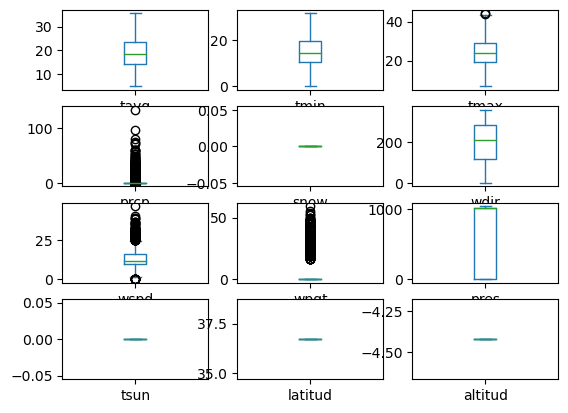

In [30]:
#Dibujemos en primer lugar diagramas de cajas y bigotes con pyplot de matplotlib:
data_tot_malaga.plot(kind='box',subplots=True, layout=(4,3), sharex=False, sharey=False)
pyplot.show()

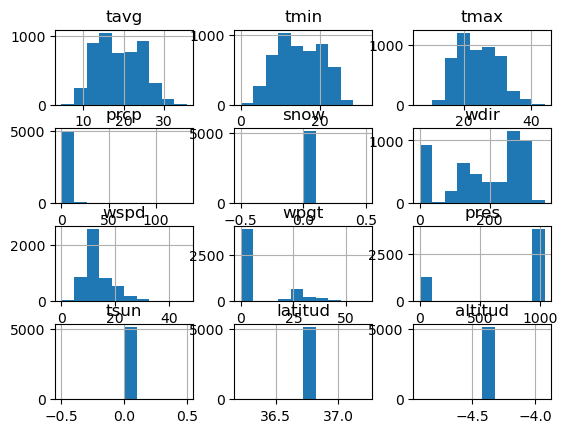

In [31]:
#Histogramas
data_tot_malaga.hist()
pyplot.show()

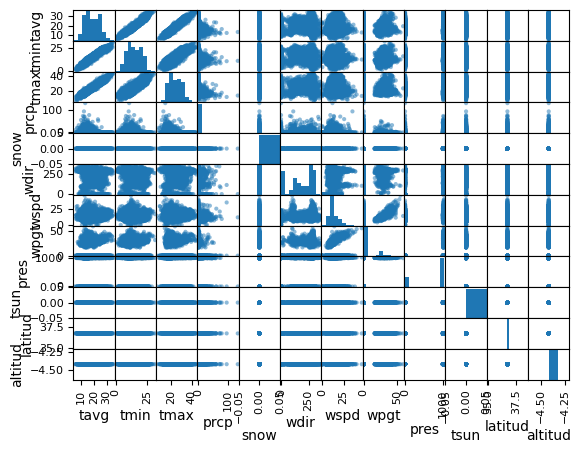

In [32]:
#Gráficos multivariable con la matriz de dispersión:
scatter_matrix(data_tot_malaga)
pyplot.show()

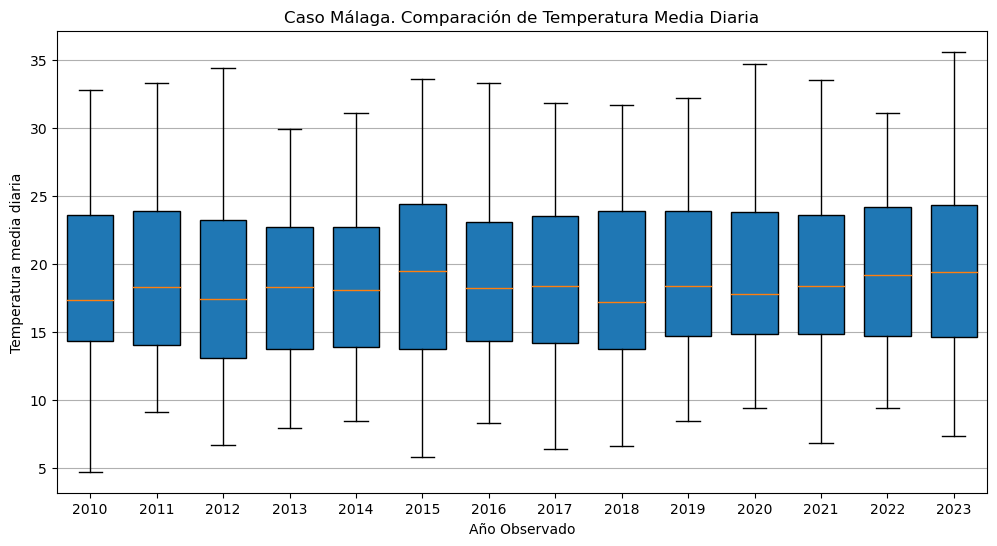

In [23]:
#Comparación de la temperatura media diaria
#Caso 1. Málaga
pyplot.figure(figsize=(12, 6))
pyplot.boxplot([data2010_malaga['tavg'], data2011_malaga['tavg'], data2012_malaga['tavg'], data2013_malaga['tavg'], data2014_malaga['tavg'], data2015_malaga['tavg'], data2016_malaga['tavg'], data2017_malaga['tavg'], data2018_malaga['tavg'], data2019_malaga['tavg'], data2020_malaga['tavg'], data2021_malaga['tavg'],  data2022_malaga['tavg'],  data2023_malaga['tavg']], widths=0.7, patch_artist=True, labels=['2010','2011','2012','2013','2014','2015','2016','2017','2018', '2019', '2020', '2021', '2022', '2023'])
pyplot.xlabel('Año Observado')
pyplot.ylabel('Temperatura media diaria')
pyplot.title('Caso Málaga. Comparación de Temperatura Media Diaria')
pyplot.grid(True, axis='y')
pyplot.show()

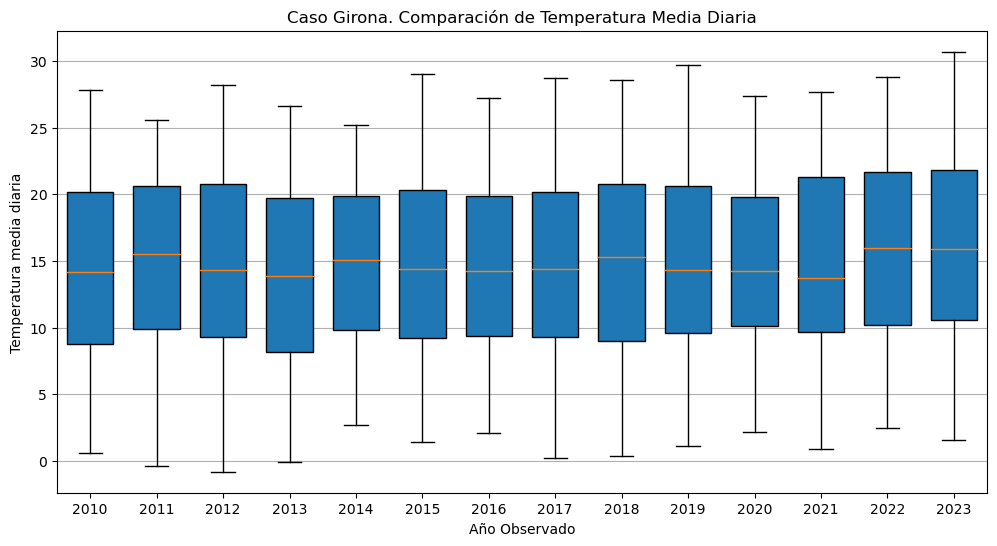

In [24]:
#Comparación de la temperatura media diaria
#Caso 2. Girona
pyplot.figure(figsize=(12, 6))
pyplot.boxplot([data2010_girona['tavg'], data2011_girona['tavg'], data2012_girona['tavg'], data2013_girona['tavg'], data2014_girona['tavg'], data2015_girona['tavg'], data2016_girona['tavg'], data2017_girona['tavg'], data2018_girona['tavg'], data2019_girona['tavg'], data2020_girona['tavg'], data2021_girona['tavg'],  data2022_girona['tavg'],  data2023_girona['tavg']], widths=0.7, patch_artist=True, labels=['2010','2011','2012','2013','2014','2015','2016','2017','2018', '2019', '2020', '2021', '2022', '2023'])
pyplot.xlabel('Año Observado')
pyplot.ylabel('Temperatura media diaria')
pyplot.title('Caso Girona. Comparación de Temperatura Media Diaria')
pyplot.grid(True, axis='y')
pyplot.show()


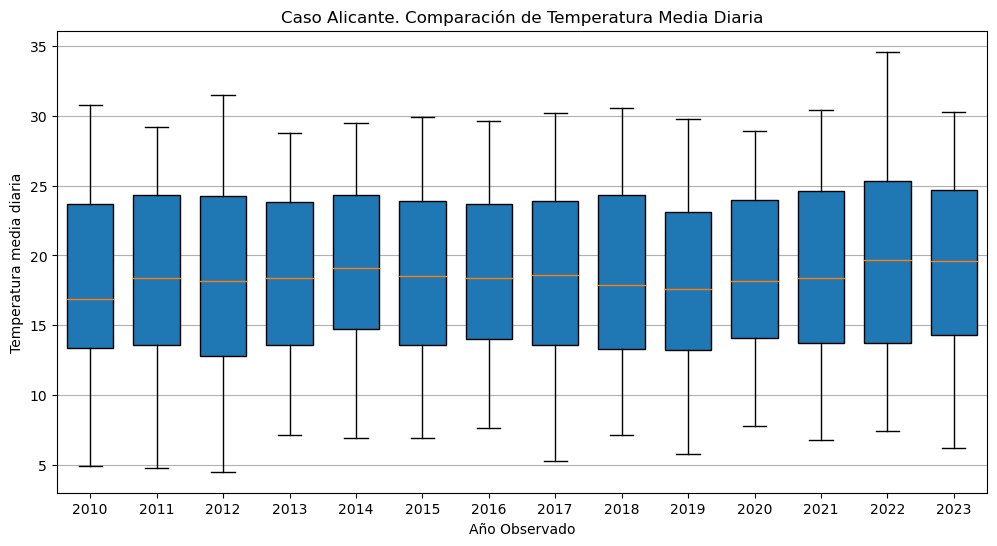

In [25]:
#Comparación de la temperatura media diaria
#Caso 3. Alicante
pyplot.figure(figsize=(12, 6))
pyplot.boxplot([data2010_alicante['tavg'], data2011_alicante['tavg'], data2012_alicante['tavg'], data2013_alicante['tavg'], data2014_alicante['tavg'], data2015_alicante['tavg'], data2016_alicante['tavg'], data2017_alicante['tavg'], data2018_alicante['tavg'], data2019_alicante['tavg'], data2020_alicante['tavg'], data2021_alicante['tavg'],  data2022_alicante['tavg'],  data2023_alicante['tavg']], widths=0.7, patch_artist=True, labels=['2010','2011','2012','2013','2014','2015','2016','2017','2018', '2019', '2020', '2021', '2022', '2023'])
pyplot.xlabel('Año Observado')
pyplot.ylabel('Temperatura media diaria')
pyplot.title('Caso Alicante. Comparación de Temperatura Media Diaria')
pyplot.grid(True, axis='y')
pyplot.show()

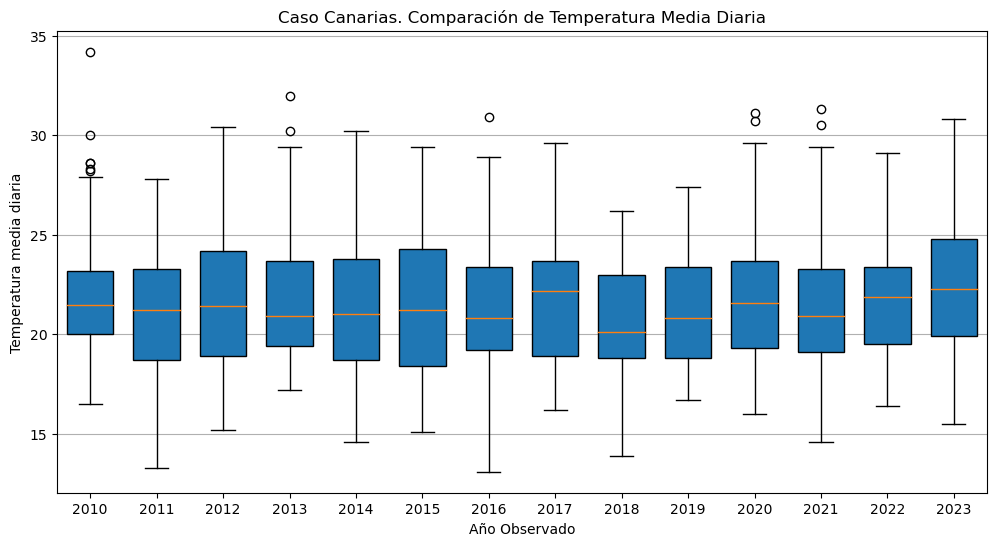

In [26]:
#Comparación de la temperatura media diaria
#Caso 4. Canarias
pyplot.figure(figsize=(12, 6))
pyplot.boxplot([data2010_canarias['tavg'], data2011_canarias['tavg'], data2012_canarias['tavg'], data2013_canarias['tavg'], data2014_canarias['tavg'], data2015_canarias['tavg'], data2016_canarias['tavg'], data2017_canarias['tavg'], data2018_canarias['tavg'], data2019_canarias['tavg'], data2020_canarias['tavg'], data2021_canarias['tavg'],  data2022_canarias['tavg'],  data2023_canarias['tavg']], widths=0.7, patch_artist=True, labels=['2010','2011','2012','2013','2014','2015','2016','2017','2018', '2019', '2020', '2021', '2022', '2023'])
pyplot.xlabel('Año Observado')
pyplot.ylabel('Temperatura media diaria')
pyplot.title('Caso Canarias. Comparación de Temperatura Media Diaria')
pyplot.grid(True, axis='y')
pyplot.show()

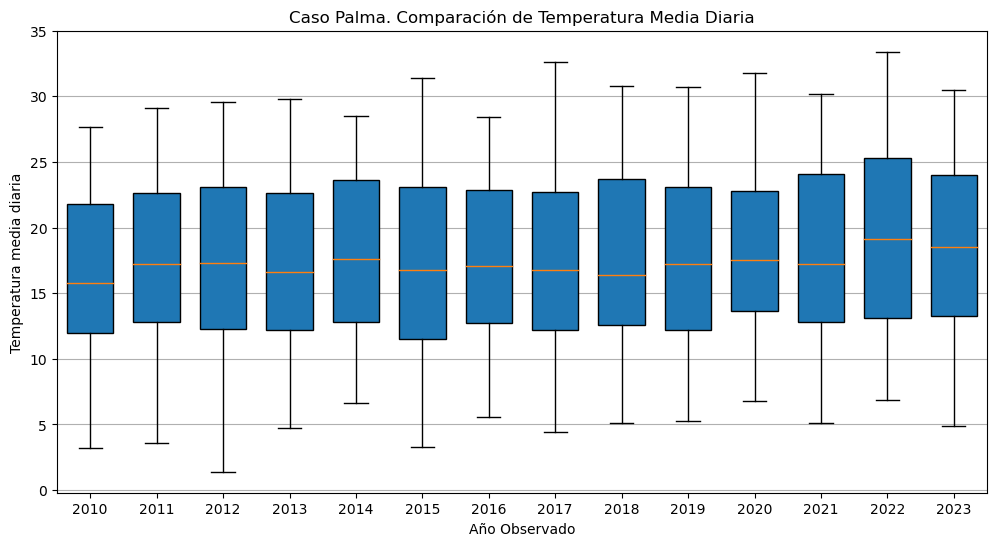

In [27]:
#Comparación de la temperatura media diaria
#Caso 5. Palma
pyplot.figure(figsize=(12, 6))
pyplot.boxplot([data2010_palma['tavg'], data2011_palma['tavg'], data2012_palma['tavg'], data2013_palma['tavg'], data2014_palma['tavg'], data2015_palma['tavg'], data2016_palma['tavg'], data2017_palma['tavg'], data2018_palma['tavg'], data2019_palma['tavg'], data2020_palma['tavg'], data2021_palma['tavg'],  data2022_palma['tavg'],  data2023_palma['tavg']], widths=0.7, patch_artist=True, labels=['2010','2011','2012','2013','2014','2015','2016','2017','2018', '2019', '2020', '2021', '2022', '2023'])
pyplot.xlabel('Año Observado')
pyplot.ylabel('Temperatura media diaria')
pyplot.title('Caso Palma. Comparación de Temperatura Media Diaria')
pyplot.grid(True, axis='y')
pyplot.show()